In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
# /content/example.txt

In [ ]:
path = "/content/example.txt"

In [ ]:
with open(path) as file:
    print(file.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



##Liczenie stref czasowych za pomocą Python

### Zamiana json na obiekt dict Python

In [ ]:
with open(path) as file:
    records = [json.loads(line) for line in file]

records[6]

{'a': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11',
 'c': 'PL',
 'nk': 0,
 'tz': 'Europe/Warsaw',
 'gr': '77',
 'g': 'wcndER',
 'h': 'zkpJBR',
 'l': 'bnjacobs',
 'al': 'pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4',
 'hh': '1.usa.gov',
 'r': 'http://plus.url.google.com/url?sa=z&n=1331923253510&url=http%3A%2F%2F1.usa.gov%2FzkpJBR&usg=TF5iGSqK1_GSADtHqTqjuUZyMIY.',
 'u': 'http://www.nasa.gov/mission_pages/nustar/main/index.html',
 't': 1331923255,
 'hc': 1331922854,
 'cy': 'Luban',
 'll': [51.116699, 15.2833]}

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

### Policzenie wystąpień stref czasowych za pomocą Python

In [ ]:
def get_counts(sequence):
    counts = {}

    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [ ]:
get_counts(time_zones)

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

### Policzenie wystąpień stref czasowych za pomocą biblioteki collections

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # Wartość inicjująca to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [ ]:
get_counts2(time_zones)

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

In [ ]:
counts = get_counts2(time_zones)
counts["Europe/Warsaw"]

16

In [ ]:
len(time_zones)

3440

### Posortowanie Top 17 za pomocą Python

In [ ]:
def top_counts(count_dict, n=17):
    value_key_pairs = [(count, tz) for tz, count in counts.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(16, 'Europe/Warsaw'),
 (20, 'America/Indianapolis'),
 (20, 'America/Phoenix'),
 (22, 'Europe/Amsterdam'),
 (25, 'America/Rainy_River'),
 (27, 'Europe/Rome'),
 (28, 'Europe/Berlin'),
 (33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

### Posortowanie Top 17 za pomocą biblioteki collections

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(17)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33),
 ('Europe/Berlin', 28),
 ('Europe/Rome', 27),
 ('America/Rainy_River', 25),
 ('Europe/Amsterdam', 22),
 ('America/Phoenix', 20),
 ('America/Indianapolis', 20),
 ('Europe/Warsaw', 16)]

##Liczenie stref czasowych za pomocą Pandas

In [ ]:
df = pd.DataFrame(records)
df.head(5)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


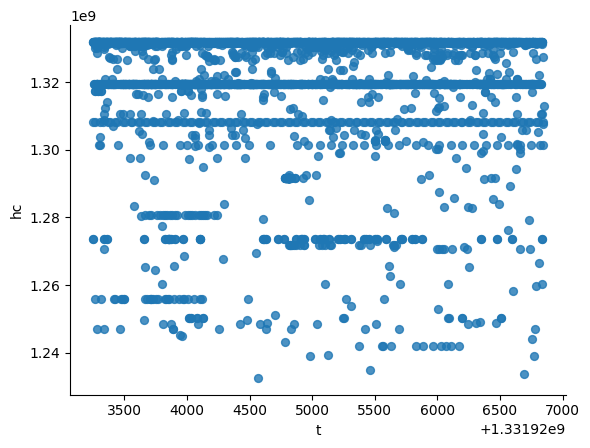

In [ ]:
# @title t vs hc

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='t', y='hc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
df['tz'].head(10)

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York
5,America/New_York
6,Europe/Warsaw
7,
8,
9,


In [ ]:
tz_counts = df['tz'].value_counts()
tz_counts.head(10)

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36
Europe/Madrid,35


In [ ]:
clean_tz = df['tz'].fillna("Brak danych")
clean_tz[clean_tz == ''] = "Nieznana"

tz_counts = clean_tz.value_counts()
tz_counts.head(20)

,count
tz,
America/New_York,1251
Nieznana,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Brak danych,120
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36


In [ ]:
import seaborn as sns

In [ ]:
subset = tz_counts.head()

<Axes: ylabel='tz'>

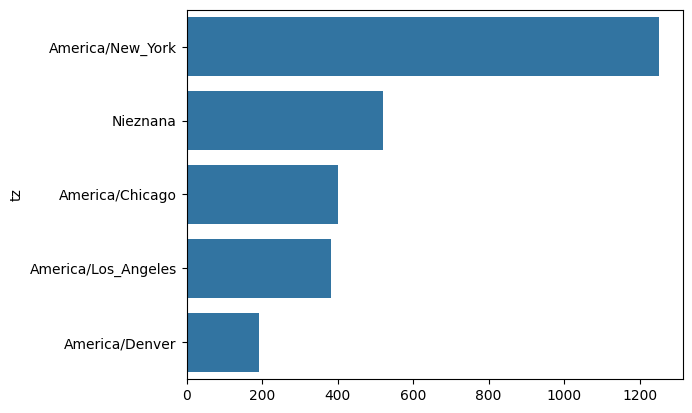

In [ ]:
sns.barplot(y=subset.index, x=subset.to_numpy())

In [ ]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [ ]:
df['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [ ]:
df['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [ ]:
[x.split()[0] for x in df.a.dropna()][3]

'Mozilla/5.0'

In [ ]:
results = pd.Series( [x.split()[0] for x in df.a.dropna()] )
results.head(10)

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0
5,Mozilla/5.0
6,Mozilla/5.0
7,Mozilla/5.0
8,Opera/9.80
9,Mozilla/5.0


In [ ]:
results.value_counts().head(10)

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4
BlackBerry8520/5.0.0.592,3
Dalvik/1.4.0,3


- Metoda notna() zwraca maskę (True/False) wskazującą, które wiersze w kolumnie 'a' nie zawierają wartości NaN.

- Filtruje DataFrame df, pozostawiając jedynie te wiersze, w których wartość w kolumnie 'a' nie jest NaN.

In [ ]:
cdf = df[df['a'].notna()].copy()

In [ ]:
cdf['os'] = np.where(cdf['a'].str.contains('Windows'), 'Windows', 'Inny System')

In [ ]:
cdf['os'].head(10)

,os
0,Windows
1,Inny System
2,Windows
3,Inny System
4,Windows
5,Windows
6,Windows
7,Windows
8,Inny System
9,Windows


In [ ]:
by_tz_os = cdf.groupby(['tz', 'os'])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0) # fillna(0): Zastępuje wszystkie brakujące wartości (NaN) w utworzonej tabeli zerami (0)
agg_counts.head()

os,Inny System,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [ ]:
indexer = agg_counts.sum('columns').argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Inny System,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [ ]:
agg_counts.sum(axis='columns').nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [ ]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Inny System,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Inny System,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Inny System,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Inny System,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Inny System,43.0
9,Europe/London,Windows,31.0


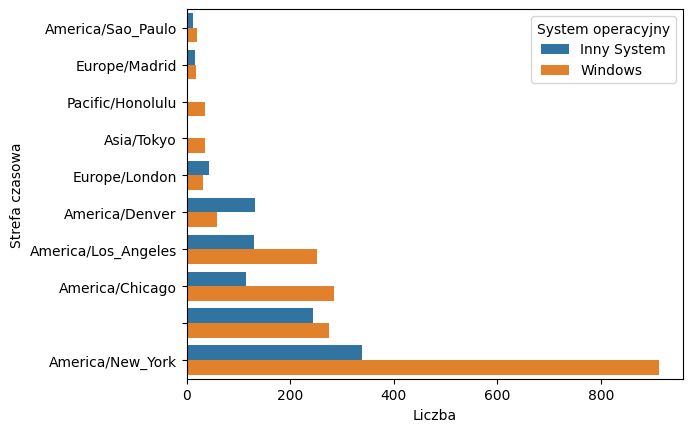

In [ ]:
gfg = sns.barplot(x="total", y="tz", hue="os",  data=count_subset)
gfg.set(xlabel ="Liczba", ylabel = "Strefa czasowa")
plt.legend(title="System operacyjny")

###Normalizacja

In [ ]:
def norm_total(group):
    group["normed_total"] = group.total / group.total.sum()
    return group
g = count_subset.groupby("tz")
results = count_subset.groupby("tz").apply(norm_total)

<ipython-input-87-eedfc7fdbffe>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


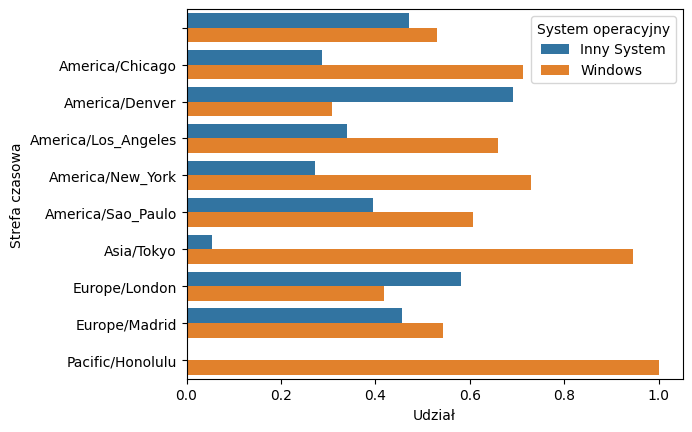

In [ ]:
gfg = sns.barplot(x="normed_total", y="tz", hue="os", data=results)
gfg.set(xlabel ="Udział", ylabel = "Strefa czasowa")
plt.legend(title="System operacyjny")